# Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aggregate_covid_country.csv', parse_dates = ['Date'])

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
# Active Case = confirmed - deaths - recovered
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [6]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
Active       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
 5   Active     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [8]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
Active                int64
dtype: object

In [9]:
df.describe(include = 'object')

,Country
count,23688
unique,188
top,Slovenia
freq,126


In [10]:
a = df.Date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-22 00:00:00
The last date is: 2020-05-26 00:00:00


In [11]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


# Top 20 countries having most confirmed cases

In [12]:
top = df[df['Date'] == df['Date'].max()]
top_casualities = top.groupby(by = 'Country')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,Country,Confirmed
0,US,1680913
1,Brazil,391222
2,Russia,362342
3,United Kingdom,266599
4,Spain,236259
5,Italy,230555
6,France,182847
7,Germany,181200
8,Turkey,158762
9,India,150793


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

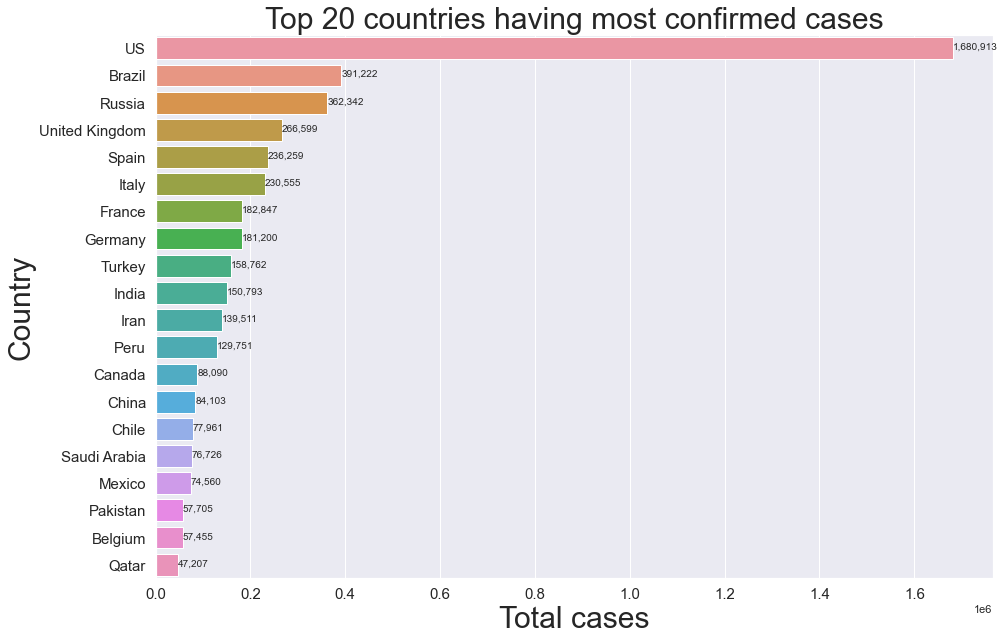

In [13]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.Confirmed, y = top_casualities.Country)
for i, (value, name) in enumerate(zip(top_casualities.Confirmed,top_casualities.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

Here are my observations :
    
1) China was leading this from many days, but now they are controlling the pandemic spread.

2) The number of confirmed cases are on a high in the US, Italy, Spain, and France.

3) But the number of cases in the third world countries is less.

# Top 20 countries having most active cases

In [14]:
top_active = top.groupby(by = 'Country')['Active'].sum().sort_values(ascending = False).head(20).reset_index()
top_active

,Country,Active
0,US,1197098
1,United Kingdom,228308
2,Russia,227406
3,Brazil,208117
4,France,88317
5,India,82172
6,Peru,73057
7,Spain,58766
8,Italy,52942
9,Chile,46240


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

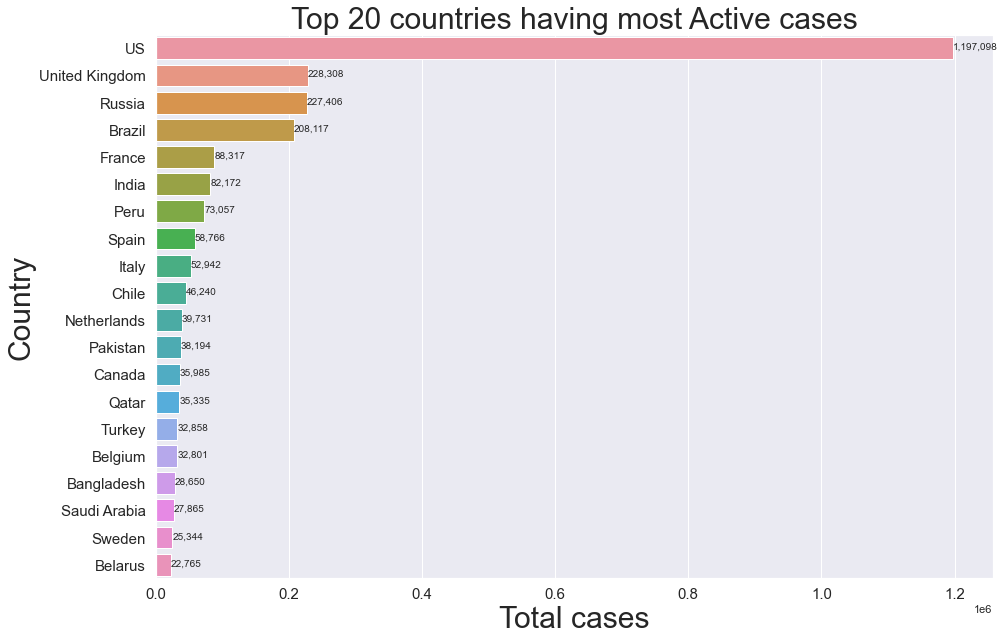

In [15]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most Active cases" , fontsize = 30)
ax = sns.barplot(x = top_active.Active, y = top_active.Country)
for i, (value, name) in enumerate(zip(top_active.Active,top_active.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

Here are my observations :
    
1) As the covid-19 testing is increasing, The active number of cases is also increasing day by day.

2) The number of active cases is on a high in the US,UK,Russia, Brazil India, Italy, Spain, and France.

3) In comparison with the total population, UK, Italy, Spain, Germany and France are the worst-hit nation.

# Top 20 countries having most recovered cases

In [16]:
top_recovered = top.groupby(by = 'Country')['Recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,Country,Recovered
0,US,384902
1,Germany,161967
2,Brazil,158593
3,Spain,150376
4,Italy,144658
5,Russia,131129
6,Turkey,121507
7,Iran,109437
8,China,79358
9,France,65997


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

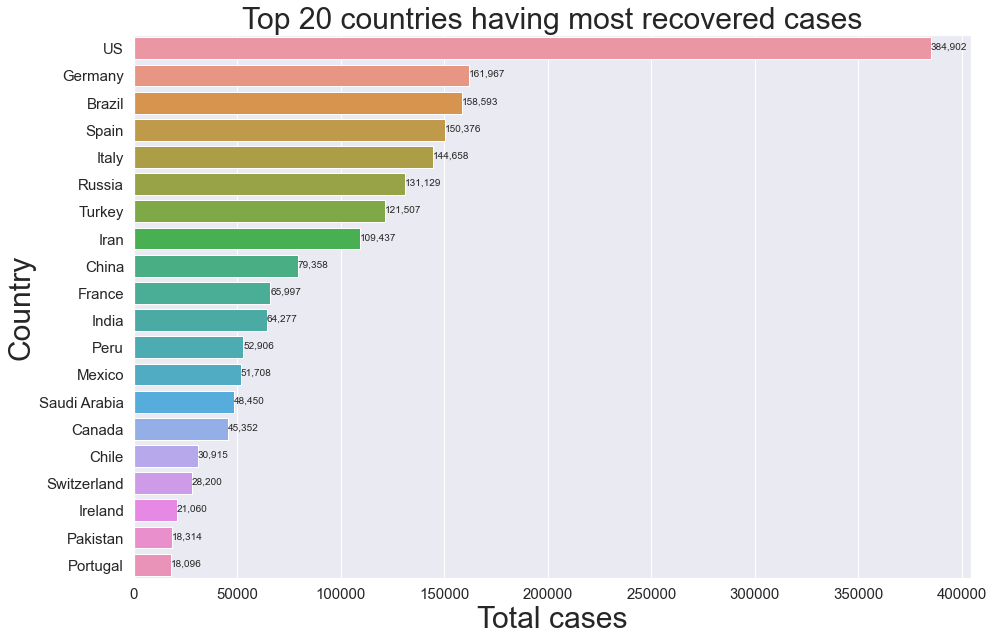

In [17]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.Recovered, y = top_recovered.Country)
for i, (value, name) in enumerate(zip(top_recovered.Recovered,top_recovered.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

Here are my observations :
1) US Recovery Rate is high but also They have lots of confirmed cases

2) By far China is leading in the number of recoveries even though having a huge number of confirmed cases

3) Italy, Iran, and Spain are also doing a good job.



# Top 20 countries having most deaths

In [18]:
top_deaths = top.groupby(by = 'Country')['Deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,Country,Deaths
0,US,98913
1,United Kingdom,37130
2,Italy,32955
3,France,28533
4,Spain,27117
5,Brazil,24512
6,Belgium,9334
7,Germany,8372
8,Mexico,8134
9,Iran,7508


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

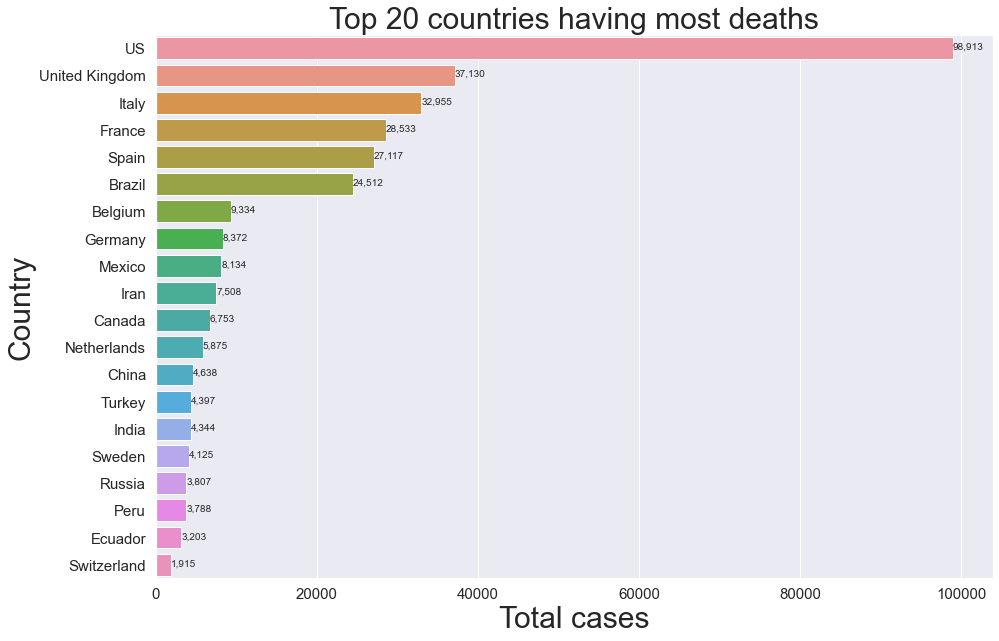

In [19]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.Deaths, y = top_deaths.Country)
for i, (value, name) in enumerate(zip(top_deaths.Deaths,top_deaths.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

Here are my observations :
    
1)  Wrost condition in US Even though Italy has the 2nd best healthcare system according to the WHO, 
   they haven't been able to tackle the pandemic problem effectively.
    
2) China even having so many confirmed cases was able to decrease the number of deaths

3) The number of deaths is also on a rise, especially in US, Italy, Spain, and Iran.

# Top 20 countries having the worst mortality and best recovery rate:

In [20]:
rate = top.groupby(by = 'Country')['Recovered','Confirmed','Deaths'].sum().reset_index()
rate['recovery percentage'] =  round(((rate['Recovered']) / (rate['Confirmed'])) * 100 , 2)
rate['death percentage'] =  round(((rate['Deaths']) / (rate['Confirmed'])) * 100 , 2)
rate.head()

,Country,Recovered,Confirmed,Deaths,recovery percentage,death percentage
0,Afghanistan,1128,11831,220,9.53,1.86
1,Albania,803,1029,33,78.04,3.21
2,Algeria,4918,8697,617,56.55,7.09
3,Andorra,676,763,51,88.60,6.68
4,Angola,18,70,4,25.71,5.71


In [21]:
mortality = rate.groupby(by = 'Country')['death percentage'].sum().sort_values(ascending = False).head(20).reset_index()
mortality

,Country,death percentage
0,MS Zaandam,22.22
1,Yemen,19.68
2,Belgium,16.25
3,France,15.60
4,Italy,14.29
5,United Kingdom,13.93
6,Hungary,13.23
7,Netherlands,12.83
8,Antigua and Barbuda,12.00
9,Sweden,11.98


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

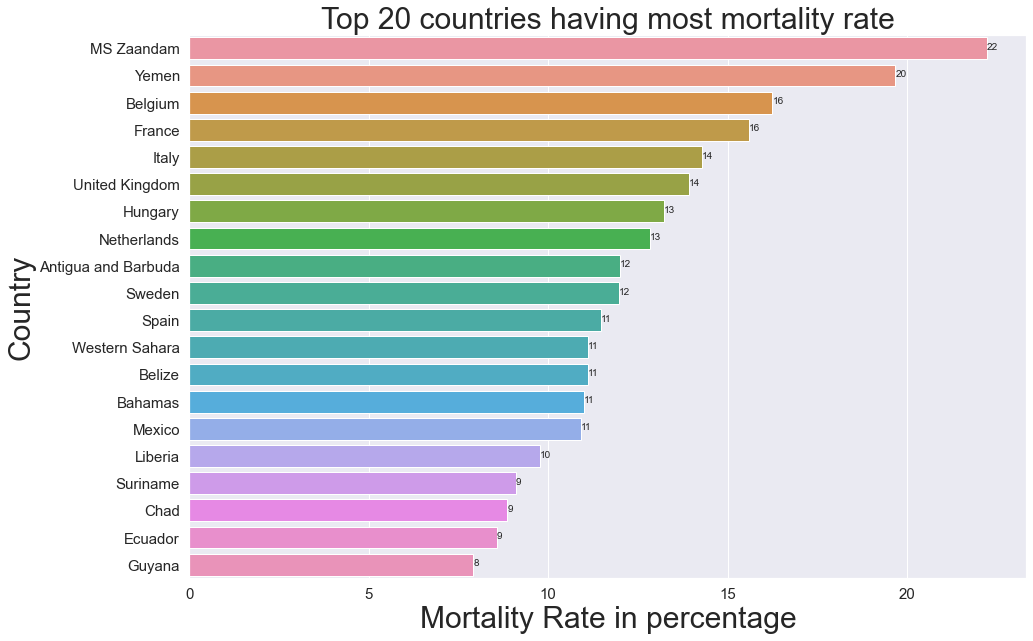

In [22]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most mortality rate" , fontsize = 30)
ax = sns.barplot(x = mortality['death percentage'], y = mortality.Country)
for i, (value, name) in enumerate(zip(mortality['death percentage'], mortality.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

Here are my observations:

1) MS Zaandam, Yemen and the Belgium have the highest mortality rate 
   because there is very less number of the confirmed cases, yet there more deaths in them.
   
2) The majority of the countries which top the list have a bad healthcare system and 
    they require help from developed countries.
    
3) When more than 10000 confirmed cases are considered, Italy is at the top and this percentage rate is very scary. 
   It seems that they have lost control over the spread of covid-19 and cannot contain it.

In [23]:
recovery = rate.groupby(by = 'Country')['recovery percentage'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

,Country,recovery percentage
0,Seychelles,100.00
1,Saint Lucia,100.00
2,Dominica,100.00
3,Eritrea,100.00
4,Saint Kitts and Nevis,100.00
5,Papua New Guinea,100.00
6,Timor-Leste,100.00
7,Iceland,99.33
8,Cambodia,98.39
9,Montenegro,97.22


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Recovery Rate in percentage')]

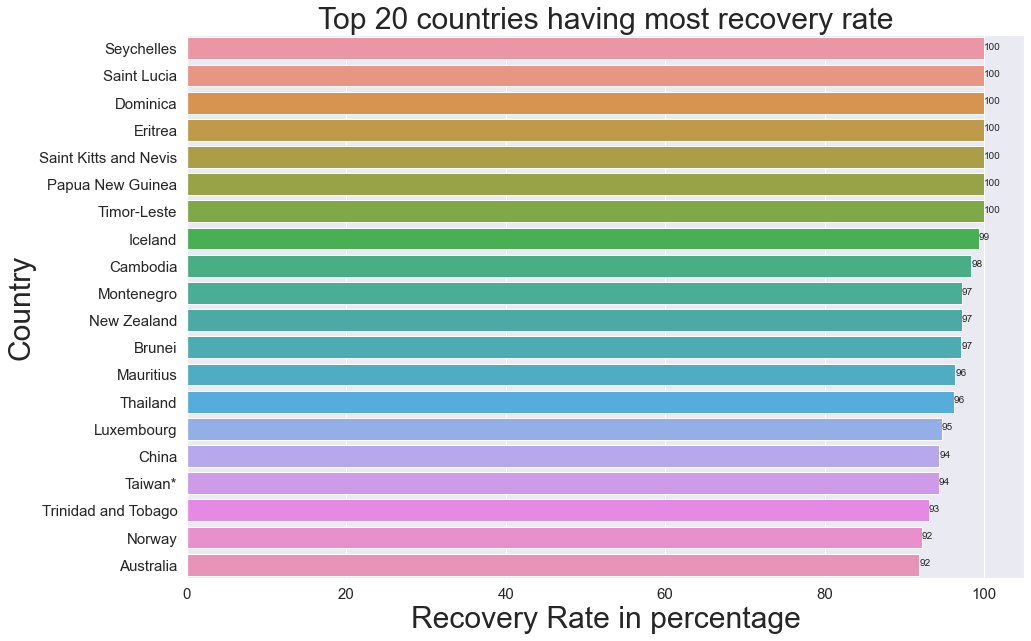

In [24]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovery rate" , fontsize = 30)
ax = sns.barplot(x = recovery['recovery percentage'], y = recovery.Country)
for i, (value, name) in enumerate(zip(recovery['recovery percentage'], recovery.Country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')

Here are my observations:

1) China tops the chart and they are doing a remarkable job with a recovery rate of 94%. 
   It tells us that in every 100 infected people, 94 people have recovered from the covid-19 virus.
   
2) New Zealand, Thailand, Taiwan, Norway and Austrailia are also doing a fantastic job treating the covid-19 virus.

3) Seychelles, Saint Lucia and the Dominica has 100% because they have very less confirmed case.

# Analysis of most affected countries

I will select the most affected countries for further analysis and visualization i.e China, US, Italy.

I will also select India so that I can analyze and foresee the covid - 19 problem of our country.

The analysis and visualizations of the covid cases in each country will start from the day of their first covid-19 case. 
From this, we can get valuable insights like the rate of growth of the covid-19 virus.

The first case of China recorded in this dataset is 22nd January,2020 . So let's consider it as day 1 and make the required changes in the dataset.

In [25]:
china =  df[df.Country == 'China']
china = china.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed', 'Active'].sum().reset_index()
china.head()


,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [26]:
us =  df[df.Country == 'US']
us = us.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed', 'Active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

,Date,Recovered,Deaths,Confirmed,Active
0,2020-02-24,5,0,51,46
1,2020-02-25,6,0,51,45
2,2020-02-26,6,0,57,51
3,2020-02-27,6,0,58,52
4,2020-02-28,7,0,60,53


In [27]:
italy =  df[df.Country == 'Italy']
italy = italy.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed', 'Active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2


In [28]:
india =  df[df.Country == 'India']
india = india.groupby(by = 'Date')['Recovered', 'Deaths', 'Confirmed', 'Active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,1,1
3,2020-02-02,0,0,2,2
4,2020-02-03,0,0,3,3


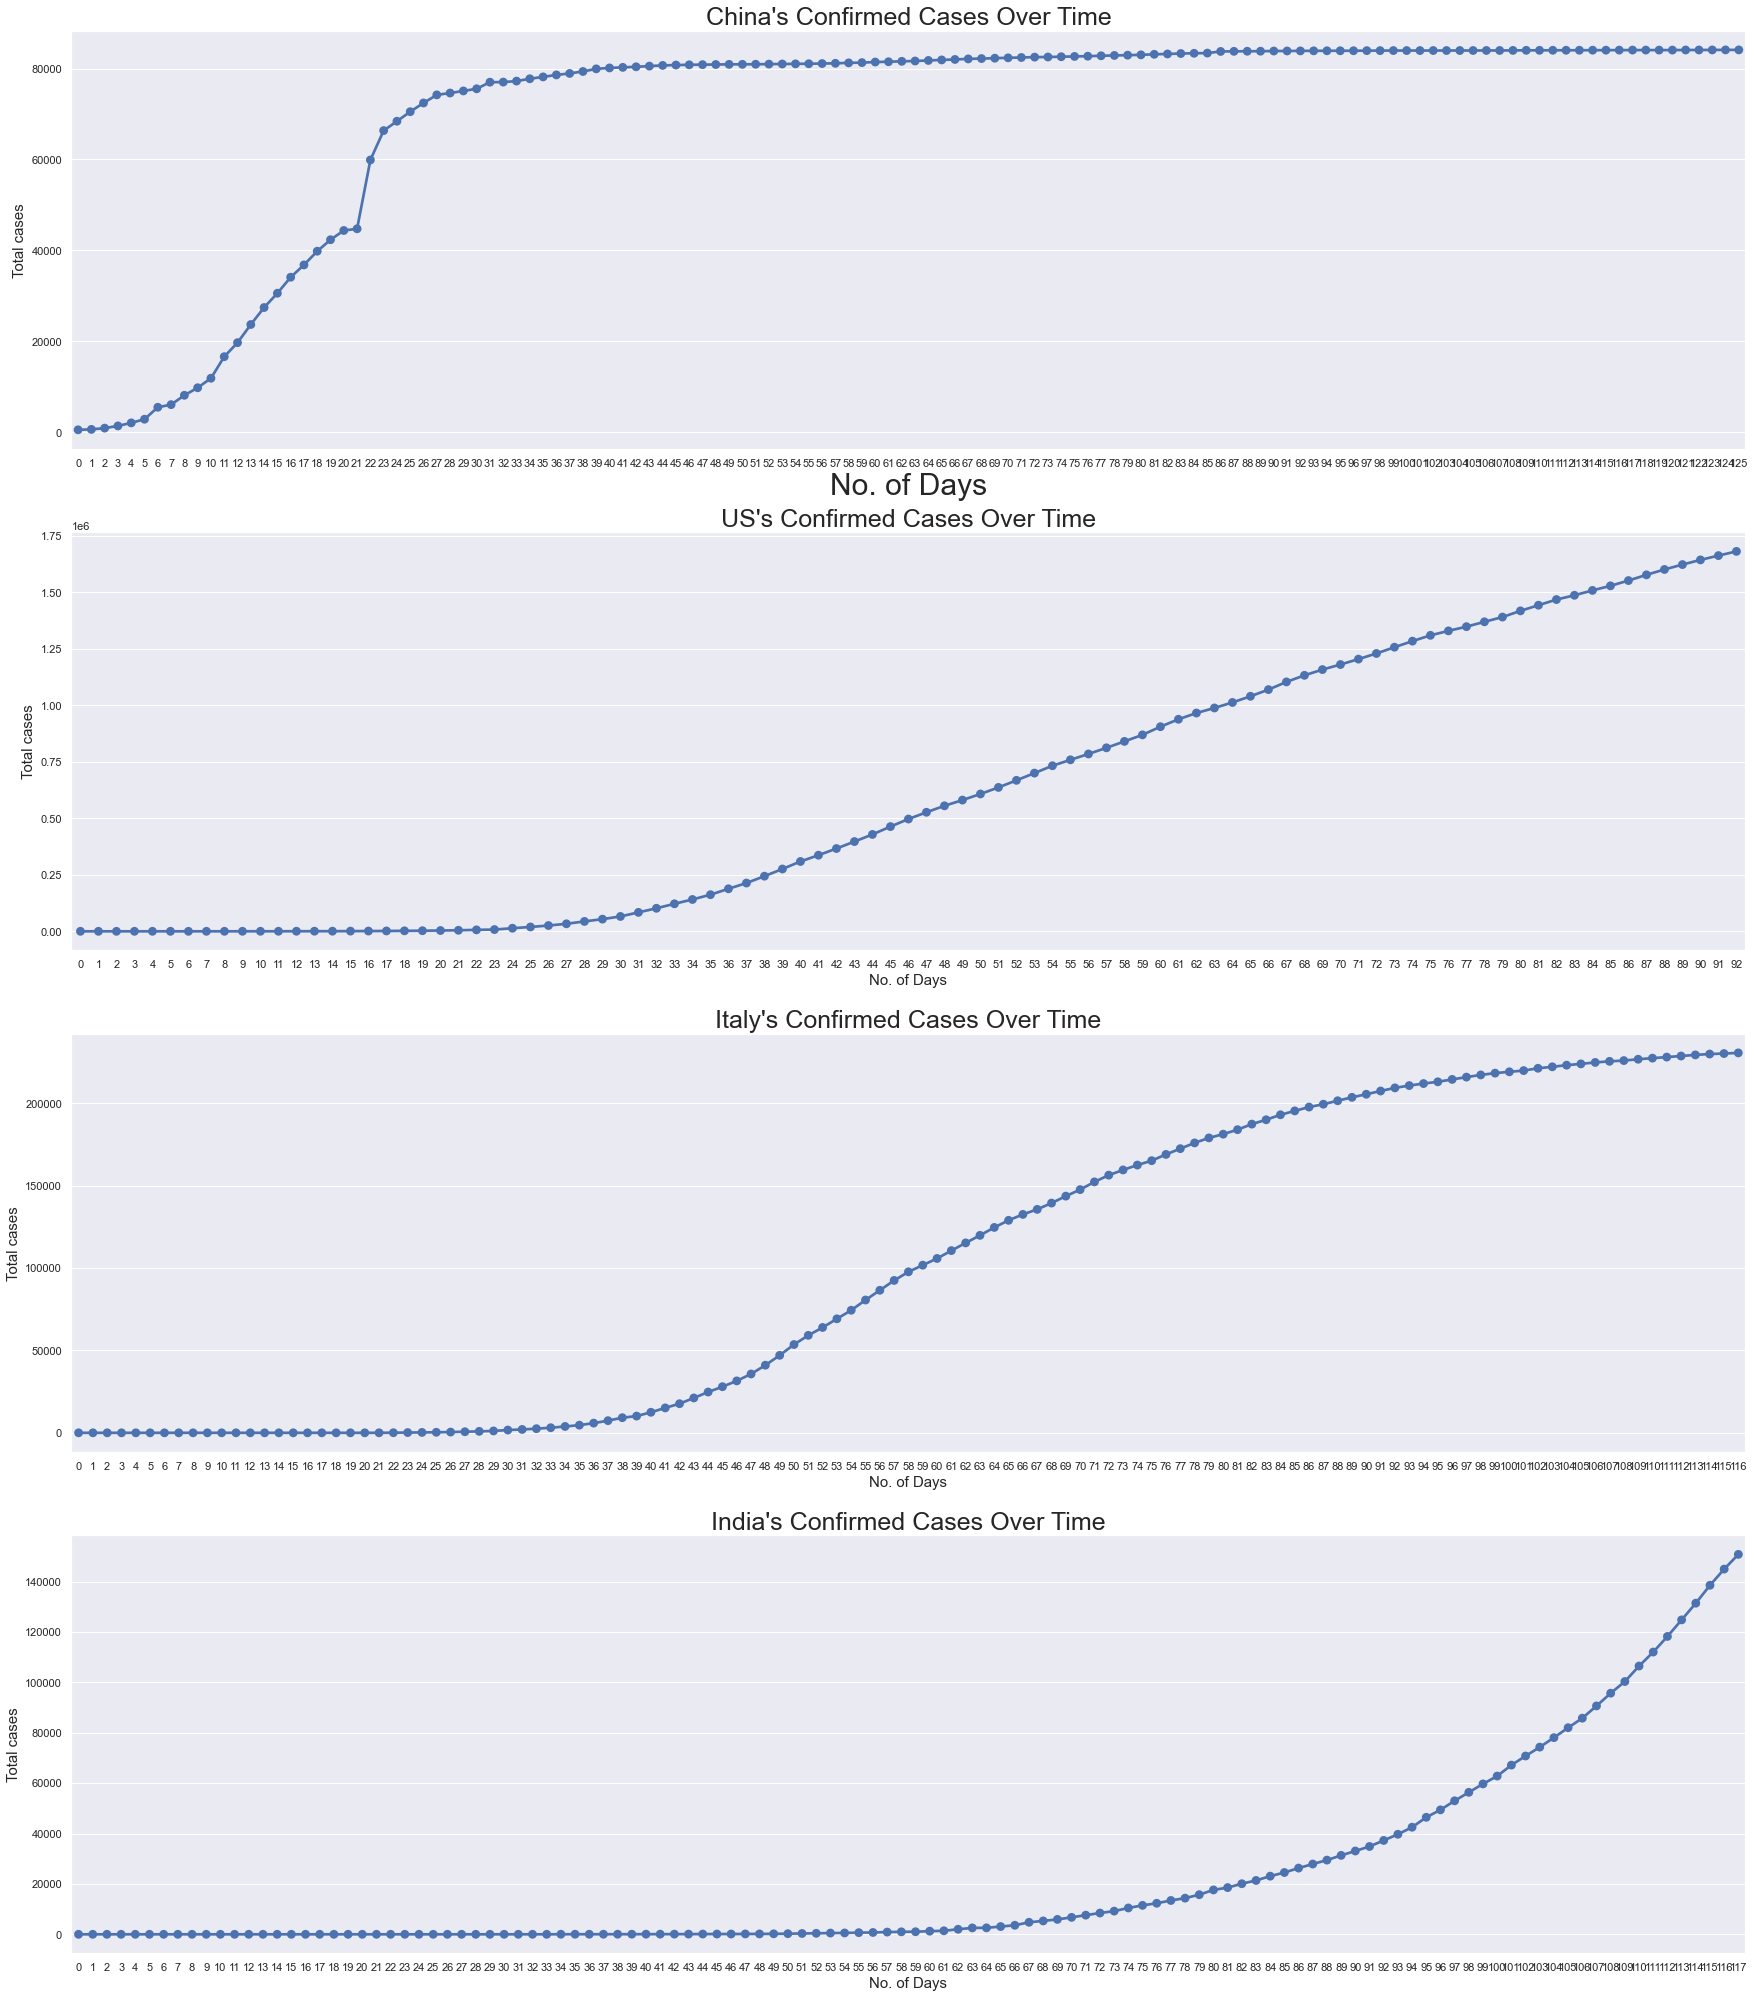

In [29]:
plt.figure(figsize=(30,30))
a = plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.Confirmed)
plt.title("China's Confirmed Cases Over Time" , fontsize = 25)
plt.ylabel('Total cases', fontsize = 15)
plt.xlabel('No. of Days', fontsize = 30)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.Confirmed)
plt.title("US's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.Confirmed)
plt.title("Italy's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.Confirmed)
plt.title("India's Confirmed Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

Here are my observations:
1) From Day 0 to Day 25, China has very a high slope as the covid-19 originated there. Whereas in other countries, the slope is quite low.

2) After day 25, there was an incremental rise in the number of cases in the US, whereas in Italy and India it is still less.

3) But after that, there is a high surge in no. of cases in US and Italy

4) India seems to be doing a great job in controlling the spread of the virus and keep the count of cases less. But lately, there has been a rise in the number of cases!

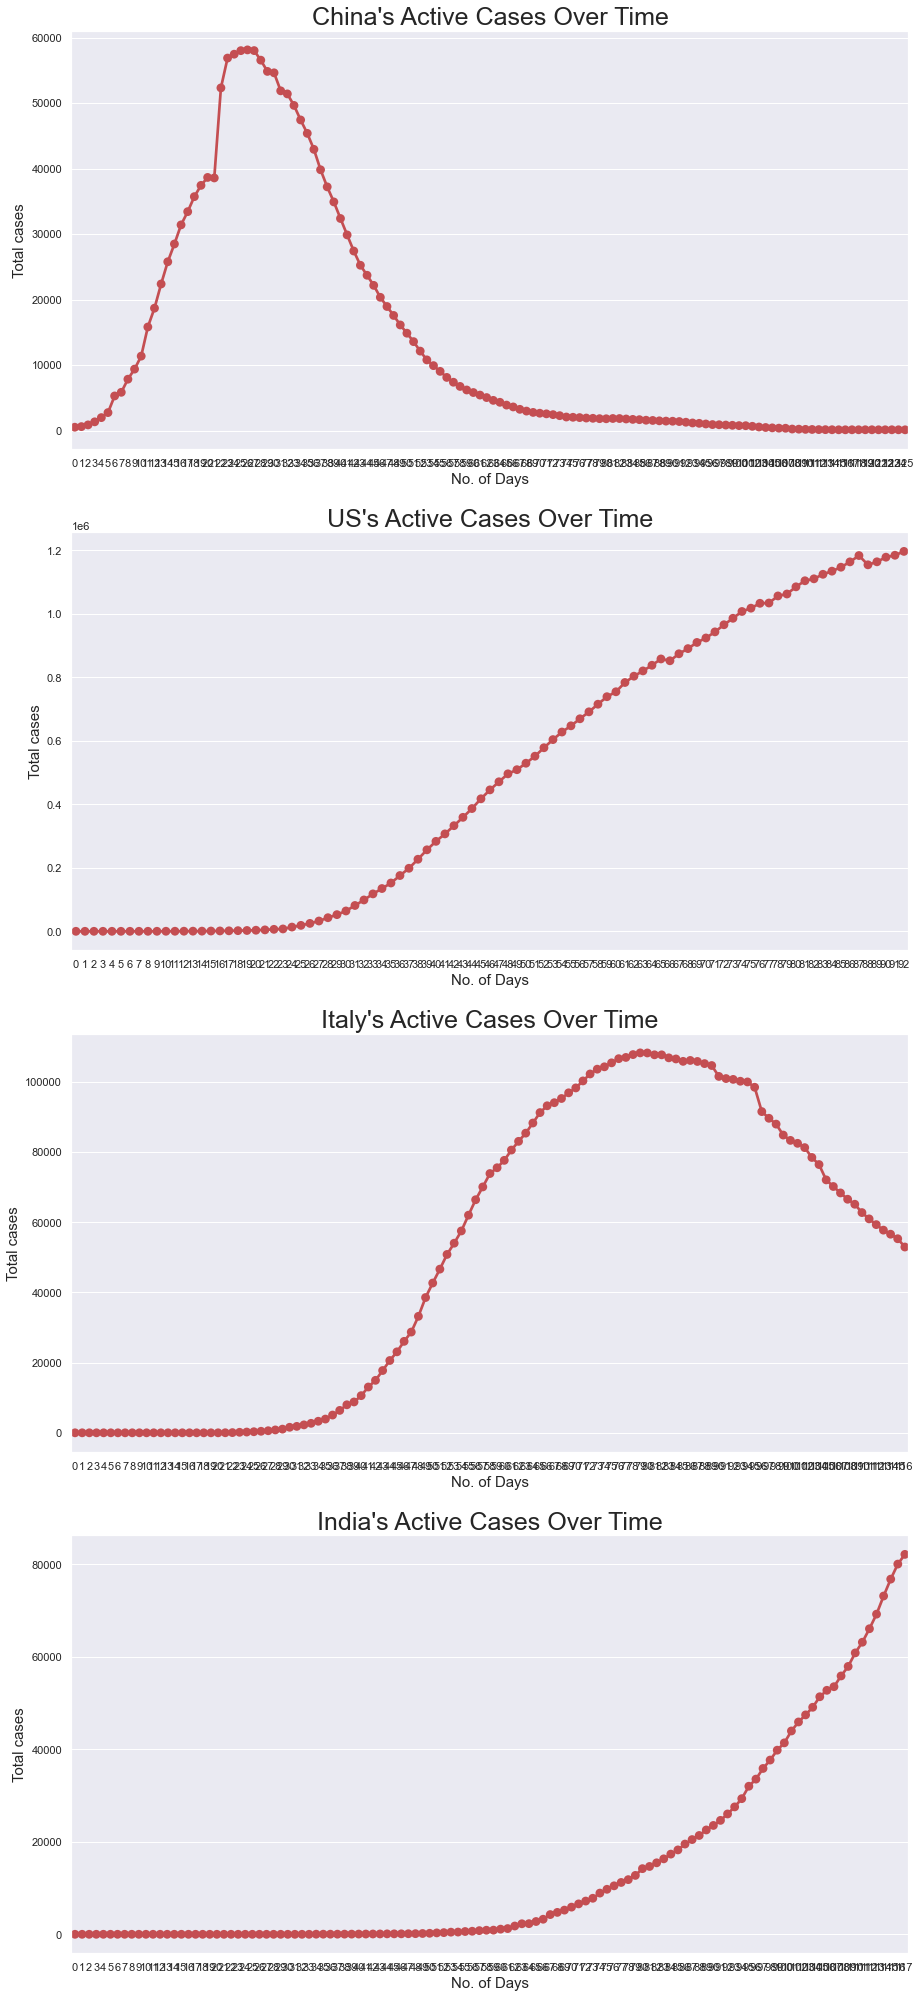

In [30]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.Active, color = 'r')
plt.title("China's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.Active, color = 'r')
plt.title("US's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.Active, color = 'r')
plt.title("Italy's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.Active, color = 'r')
plt.title("India's Active Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

Here are my observations:
1) It's showing the same insights as to the confirmed cases

2) But the only difference is the no.of active cases in China has been incrementally decreasing from day 30 
  as there a few deaths and a lot of recovered people and they have also prevented the spread of the covid-19 virus.
    
3) The no. of active cases in the US and Italy is rising detrimentally.

4) Even though the slope of India is high but the rate of increase is less.

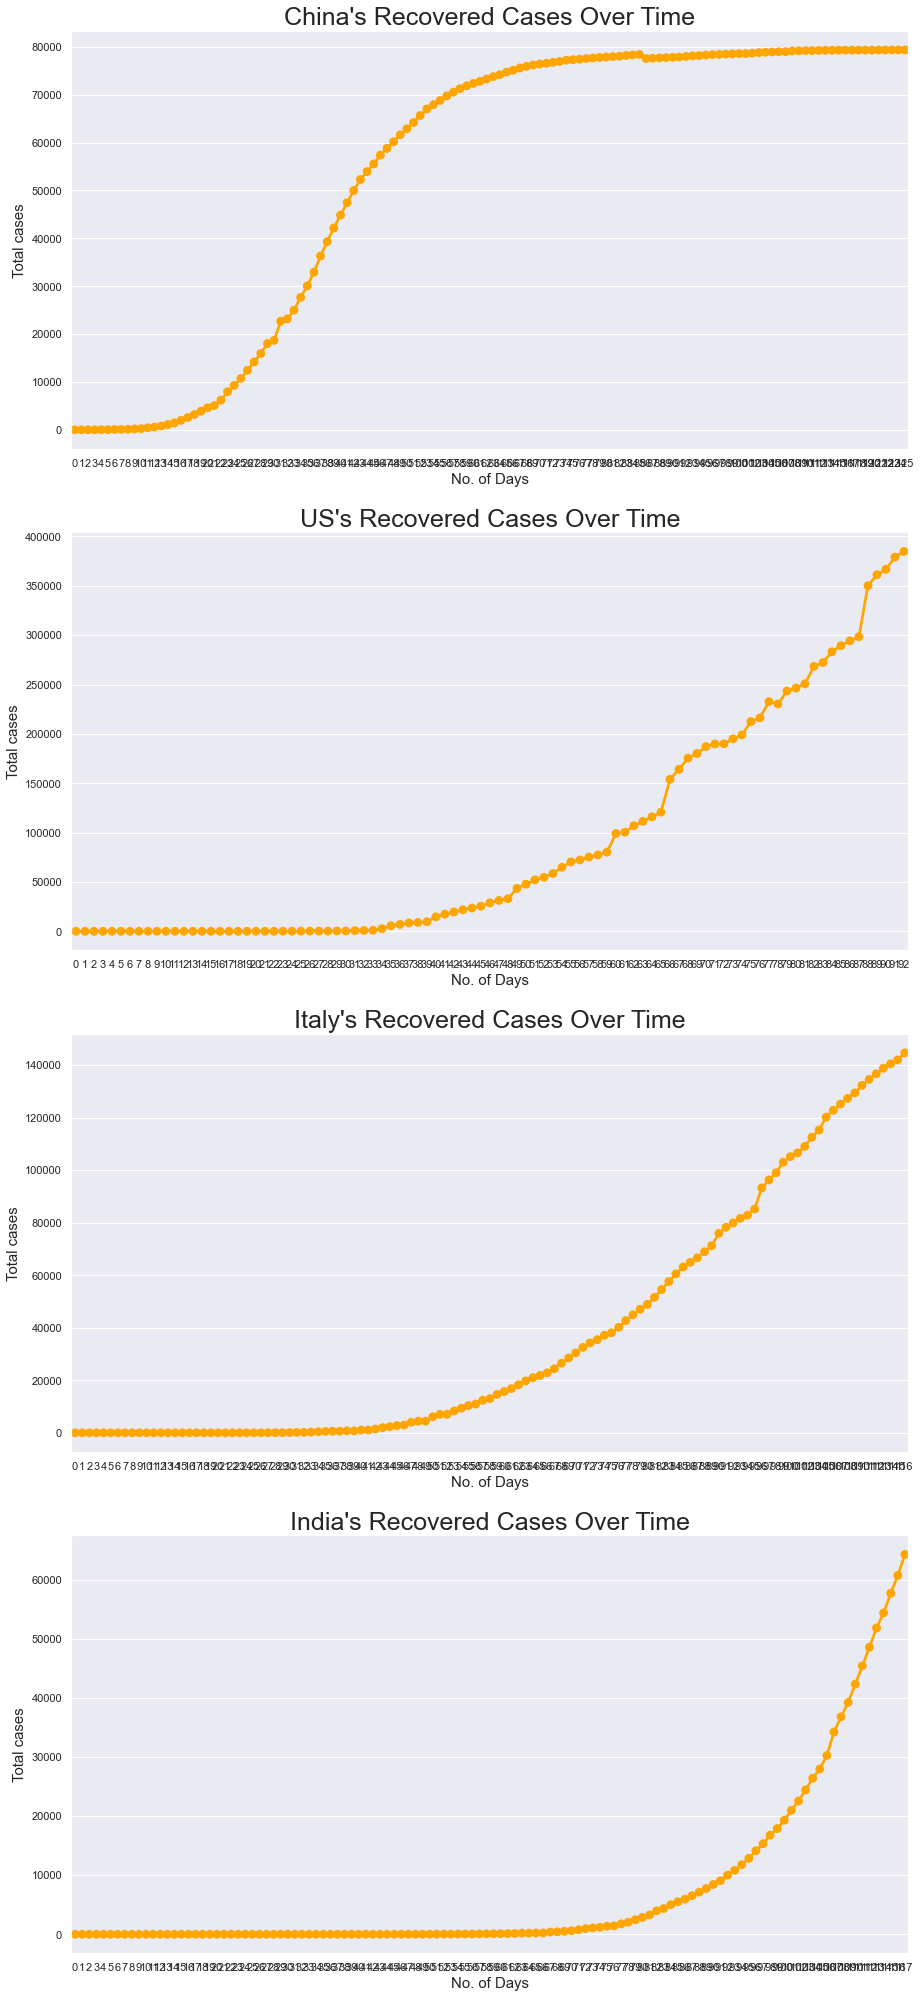

In [31]:
plt.figure(figsize=(15,30))
plt.subplot(4, 1, 1)
sns.pointplot(china.index ,china.Recovered, color = 'orange')
plt.title("China's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 2)
sns.pointplot(us.index ,us.Recovered, color = 'orange')
plt.title("US's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 3)
sns.pointplot(italy.index ,italy.Recovered, color = 'orange')
plt.title("Italy's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplot(4, 1, 4)
sns.pointplot(india.index ,india.Recovered, color = 'orange')
plt.title("India's Recovered Cases Over Time" , fontsize = 25)
plt.xlabel('No. of Days', fontsize = 15)
plt.ylabel('Total cases', fontsize = 15)

plt.subplots_adjust(bottom=0.01, top=0.9)

Here are my observations:
    
1) Compared to the number of confirmed cases, China has done an incredible job in recovering 
    so many patients from the covid-19 pandemic.
    
2) Italy is also trying to increase the number of recoveries, but lately the number of deaths has gone through the roof.

3) Recoveries of the US and India are also less.

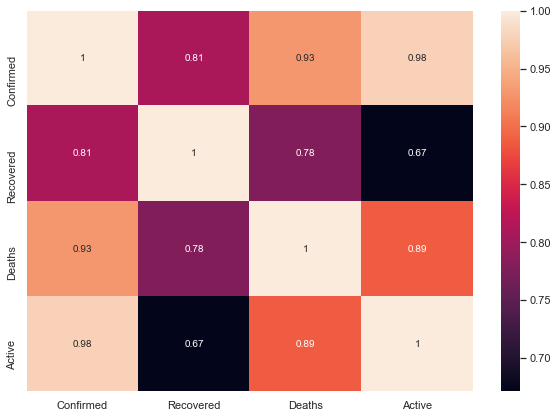

In [32]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()

In [33]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Active'], dtype='object')

In [34]:
X = df[['Confirmed','Active']]
y = df[['Deaths']]
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.8720617731900173

In [36]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 264.9004791091456
mean squared error: 1975813.2486173948


In [37]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1405.6362433493932


In [38]:
import joblib
joblib.dump(LR, 'covid_19_pkl')

['covid_19_pkl']